In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

2025-08-03 15:59:03.777509: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-03 15:59:03.781741: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-03 15:59:03.796867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754216943.821171    6959 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754216943.828389    6959 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754216943.846271    6959 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to fit a CNN. A CNN expects a 4D tensor:
# (num_samples, height, width, channels)
# For MNIST, the channel is 1 because the images are grayscale.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


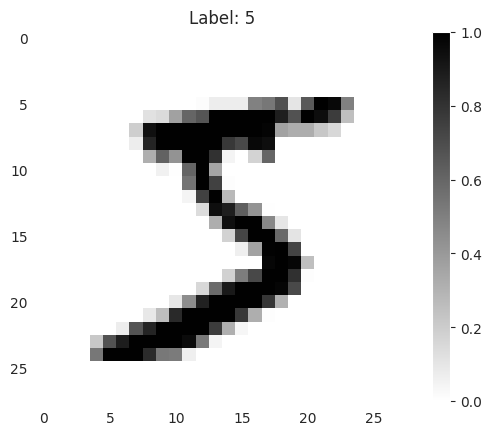

In [4]:
# Printing single image
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
model = Sequential([
    # First Convolutional Layer: Learns 32 different filters (features).
    # kernel_size=(3,3) means it looks at 3x3 pixel chunks.
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    # Max Pooling Layer: Downsamples the image to make it more manageable
    # and helps the model become invariant to small shifts in position.
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer: Learns 64 filters.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten Layer: Converts the 2D feature maps into a 1D vector
    # to be fed into the final Dense layers.
    Flatten(),

    # Dropout Layer: A regularization technique to prevent overfitting.
    # It randomly sets 50% of the input units to 0 at each update during training.
    Dropout(0.5),

    # Final Dense Layer (Output Layer): 10 neurons for 10 digits.
    # Softmax activation gives a probability distribution for each class.
    Dense(10, activation='softmax')
])

/home/rajendrayadav/PycharmProjects/llm-project/.venv/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-03 15:59:06.890191: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
print("\n--- Training the model ---")
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
print("--- Model training finished ---")


--- Training the model ---
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9360 - loss: 0.2069 - val_accuracy: 0.9822 - val_loss: 0.0560
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9749 - loss: 0.0807 - val_accuracy: 0.9851 - val_loss: 0.0444
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9800 - loss: 0.0640 - val_accuracy: 0.9855 - val_loss: 0.0419
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9819 - loss: 0.0573 - val_accuracy: 0.9901 - val_loss: 0.0320
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9839 - loss: 0.0493 - val_accuracy: 0.9905 - val_loss: 0.0276
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9861 - loss: 0.0449 - val_accuracy: 0.9906 - val_loss: 0.0299
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9877 - loss: 0.0394 - val_accuracy: 0.9910 - val_loss: 0.0291
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19

In [9]:
print("\n--- Evaluating the model ---")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


--- Evaluating the model ---
313/313 - 2s - 8ms/step - accuracy: 0.9927 - loss: 0.0222

Test accuracy: 0.9927
Test loss: 0.0222


In [10]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [11]:
print("\n--- Making a prediction ---")
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]

print("Prediction for the first test image:", predicted_label)
print("True label for the first test image:", true_label)


--- Making a prediction ---
Prediction for the first test image: 7
True label for the first test image: 7


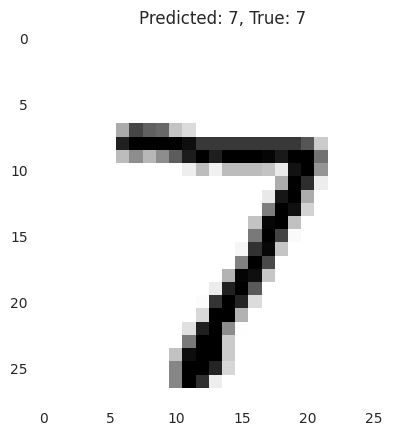

In [12]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.grid(False)
plt.show()

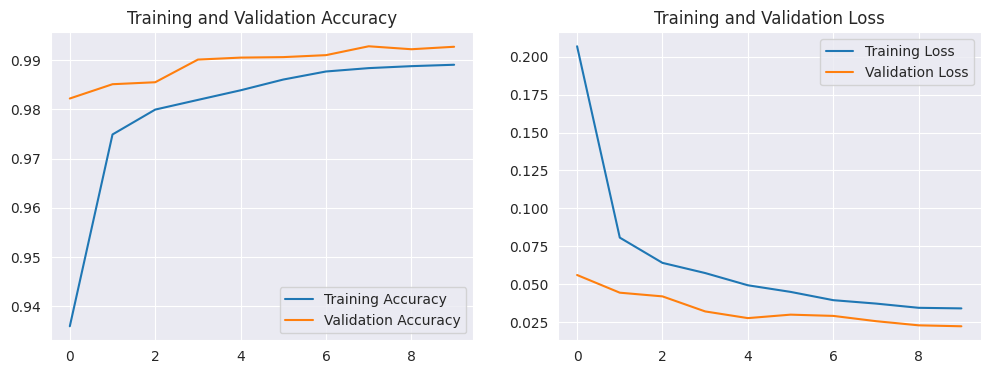

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix


--- Generating Confusion Matrix ---


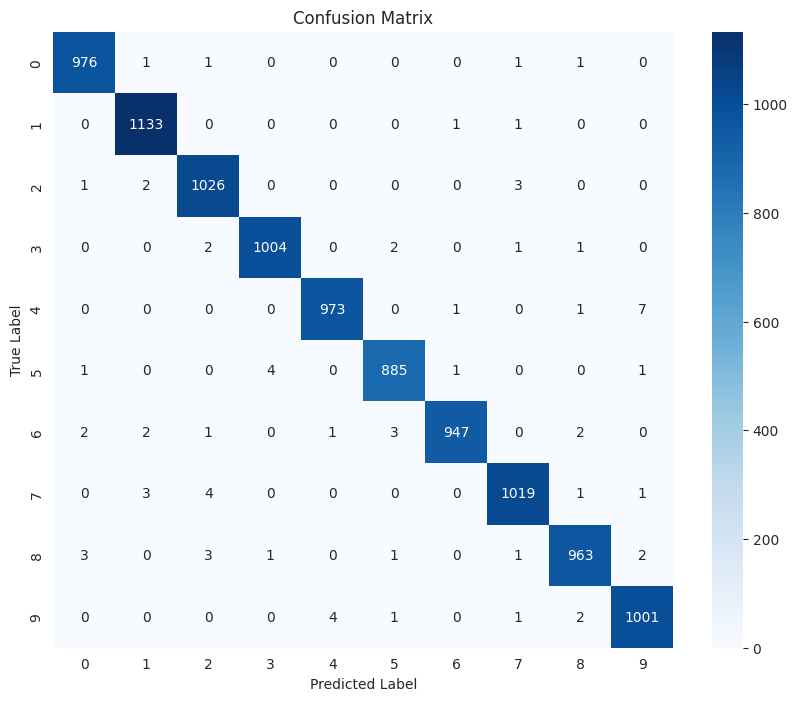

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("\n--- Generating Confusion Matrix ---")
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Saving model to `models/mnist_model.keras`

In [15]:
model.save('models/mnist_model.keras')
print("Model saved to mnist_model.keras")

Model saved to mnist_model.keras


## Loading saved model

In [16]:
loaded_model = tf.keras.models.load_model('models/mnist_model.keras')

In [17]:
predictions = loaded_model.predict(x_test)
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]

print("Prediction for the first test image:", predicted_label)
print("True label for the first test image:", true_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Prediction for the first test image: 7
True label for the first test image: 7


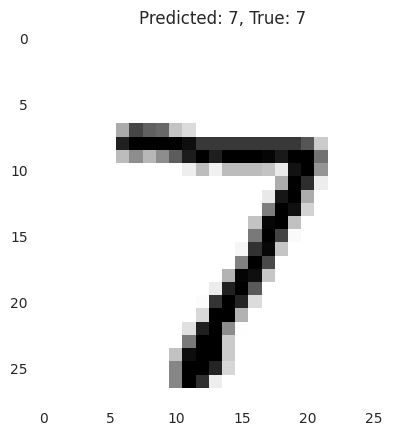

In [18]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.grid(False)
plt.show()